# Uber Fares Dataset Analysis 

Description:

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

The datset contains the following fields:

1. key - a unique identifier for each trip
2. fare_amount - the cost of each trip in usd
3. pickup_datetime - date and time when the meter was engaged
4. passenger_count - the number of passengers in the vehicle (driver entered value)
5. pickup_longitude - the longitude where the meter was engaged
6. pickup_latitude - the latitude where the meter was engaged
7. dropoff_longitude - the longitude where the meter was disengaged
8. dropoff_latitude - the latitude where the meter was disengaged

Acknowledgement: The dataset is referred from Kaggle.

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the fare price of uber ride.
Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('uber dataset.csv')

In [3]:
df.head()

,ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
## Summary of the UBER dataset. 
df.describe()

,ID,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


Describing the FARE from the dataset:

The avearge cab fare is 11.359955 USD. 
Considering the standard deviation (that is 9.90), it shows there is high dispersion in the data. There are outliers as well. 
The minimum fare paid is in negative, that is, -52 USD. 
The maximum paid fair is 499 USD. 
As per the percentaile values - 
1. 25% of the fares are below the 6 USD. 
2. 50% of the fare are below the 8.5 USD. 
3. 75% of the fare are below the 12.50 USD. 


In [10]:
#Deleting the unneccessry columns - key and ID

del df['key']
del df['ID']

In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,19:52:06,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,20:04:56,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,21:45:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,08:22:21,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,17:47:00,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
# Changing the pick up date and time into time format. 
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'] = df['pickup_datetime'].dt.time

In [16]:
#### Putting the pickup_time into ascending order. 

df.sort_values('pickup_datetime', ascending = True, inplace = True, ignore_index = True)

In [17]:
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,8.1,00:00:00,-73.956350,40.771332,-73.949040,40.794297,2
1,16.0,00:00:00,-73.999695,40.738612,-73.949835,40.785492,1
2,3.7,00:00:00,-73.991925,40.726435,-74.001428,40.726015,1
3,14.5,00:00:00,-73.958412,40.760277,-73.914157,40.764852,1
4,14.5,00:00:00,-73.992595,40.720422,-73.951990,40.773127,1
5,6.5,00:00:00,-74.000467,40.742400,-73.990305,40.759807,3
6,6.5,00:00:00,-73.989182,40.742001,-73.992088,40.749722,1
7,9.3,00:00:00,-73.998805,40.728127,-73.980978,40.750862,1
8,4.9,00:00:00,-73.996727,40.742788,-73.987575,40.733427,2
9,9.0,00:00:00,-73.989950,40.761677,-73.952565,40.791580,1


In [19]:
# Grouping the fare with time cabs booked. 
# What is the maximum fare people paid as per the time. 

data = df.groupby('pickup_datetime')['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'].max().reset_index()
data = data.sort_values('pickup_datetime', ascending = True)
data = data[['pickup_datetime','fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
data = data.reset_index(drop = True)

C:\Users\sudes\AppData\Local\Temp/ipykernel_56616/630728922.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby('pickup_datetime')['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'].max().reset_index()


In [22]:
data

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,00:00:00,275.0,0.000000,40.803312,0.000000,40.825017
1,00:00:02,10.5,-74.006600,40.739723,-73.985401,40.743185
2,00:00:03,14.1,-73.987960,40.761532,-73.964940,40.755788
3,00:00:07,31.5,-73.974217,40.761904,-73.902328,40.892201
4,00:00:09,30.9,-73.783580,40.762154,-73.922088,40.767235
...,...,...,...,...,...,...
59067,23:59:54,14.1,-73.864919,40.779153,-73.884767,40.771646
59068,23:59:55,9.5,-73.930061,40.732377,-73.930061,40.727036
59069,23:59:57,6.0,-73.991553,40.750460,-73.986270,40.737740
59070,23:59:58,9.3,-73.986356,40.738965,-73.984163,40.765069


This shows as per the pickup_datetime, what maximum fare people are ready to pay. 

In [24]:
## Minimum fair paid at what time? 
min_fare = df.groupby('pickup_datetime')['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'].min().reset_index()
min_fare = min_fare.sort_values('pickup_datetime',ascending = True)
min_fare = min_fare[['pickup_datetime','fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
min_fare = min_fare.reset_index(drop = True)
min_fare

C:\Users\sudes\AppData\Local\Temp/ipykernel_56616/2383359186.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  min_fare = df.groupby('pickup_datetime')['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'].min().reset_index()


,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,00:00:00,3.0,-74.009652,0.000000,-74.005707,0.000000
1,00:00:02,10.5,-74.006600,40.739723,-73.985401,40.743185
2,00:00:03,8.5,-73.999143,40.690340,-73.996441,40.722075
3,00:00:07,10.5,-74.001620,40.735537,-74.009417,40.725980
4,00:00:09,14.0,-73.966003,40.648620,-74.004395,40.742275
...,...,...,...,...,...,...
59067,23:59:54,4.5,-73.983028,40.726796,-74.007573,40.727843
59068,23:59:55,5.0,-73.996337,40.727036,-73.992687,40.725433
59069,23:59:57,6.0,-73.991553,40.750460,-73.986270,40.737740
59070,23:59:58,7.0,-73.994519,40.722988,-73.998935,40.738492


This shows the minimum fare paid by the people as per the pickup_datetime. 

In [25]:
## Distance travelled by the people. 

In [26]:
lat1 = df['pickup_latitude']
lat2 = df['dropoff_latitude']
lon1 = df['pickup_longitude']
lon2 = df['dropoff_longitude']
df['distance'] = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

In [27]:
df.tail(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
199990,10.6,23:59:54,-73.864919,40.770542,-73.884767,40.749713,1,0.028771
199991,5.0,23:59:55,-73.996337,40.732377,-73.992687,40.725433,1,0.007845
199992,9.5,23:59:55,-73.930061,40.727036,-73.930061,40.727036,1,0.000000
199993,6.0,23:59:57,-73.991553,40.750460,-73.986270,40.737740,1,0.013773
199994,9.3,23:59:58,-73.986356,40.738965,-73.984163,40.765069,2,0.026196
199995,7.0,23:59:58,-73.994519,40.722988,-73.998935,40.738492,3,0.016121
199996,9.0,23:59:59,-74.004860,40.734934,-73.983040,40.746468,1,0.024681
199997,6.5,23:59:59,-73.983186,40.766907,-73.973188,40.755174,1,0.015415
199998,12.5,23:59:59,-73.982288,40.765794,-73.988414,40.724135,1,0.042107
199999,9.5,23:59:59,-73.981873,40.778272,-73.950484,40.797423,1,0.036770


In [28]:
# Putting distance columns into descending order. 

In [30]:
max_distance = df.groupby('pickup_datetime')['fare_amount','distance','passenger_count'].sum().reset_index()
max_distance = max_distance.sort_values('distance', ascending = False)
max_distance = max_distance[['pickup_datetime','fare_amount','distance','passenger_count']]
max_distance = max_distance.reset_index(drop = True)

C:\Users\sudes\AppData\Local\Temp/ipykernel_56616/1517186507.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_distance = df.groupby('pickup_datetime')['fare_amount','distance','passenger_count'].sum().reset_index()


In [31]:
max_distance

,pickup_datetime,fare_amount,distance,passenger_count
0,13:24:00,963.09,2437.405961,183
1,00:22:00,718.53,2235.151249,140
2,10:04:00,1264.65,751.161706,178
3,11:55:00,731.73,696.338334,155
4,00:58:00,569.34,675.886135,102
...,...,...,...,...
59067,14:41:52,4.50,0.000000,1
59068,18:10:57,6.90,0.000000,1
59069,08:47:56,5.70,0.000000,1
59070,08:48:05,20.50,0.000000,1


In [32]:
max_distance.describe()

,fare_amount,distance,passenger_count
count,59072.000000,59072.000000,59072.000000
mean,38.461387,0.870013,5.703328
std,122.278057,17.346706,22.481313
min,-50.500000,0.000000,0.000000
25%,8.900000,0.021121,1.000000
50%,16.000000,0.042699,2.000000
75%,28.200000,0.083361,3.000000
max,1582.240000,2437.405961,320.000000


In [33]:
# The maximum fare amount paid was 1582.24000. Looking at the corresponsing values relevant to this. 

In [41]:
maxd = max_distance[max_distance['fare_amount'] == 1582.240000]
for index, row in maxd.iterrows(): 
    print( row['fare_amount'], " | ", row['distance'], " | ", row['passenger_count'])

1582.24  |  3.6825454129630395  |  211


In [43]:
fare = 1582.24/211
fare

7.498767772511848

In [48]:
print("As per this result,", fare, "USD", " can be charged from one passenger for 3.68 overall distance")

As per this result, 7.498767772511848 USD  can be charged from one passenger for 3.68 overall distance


{'whiskers': [<matplotlib.lines.Line2D at 0x25ec82e19d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25ec82f6070>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ec82e1550>],
 'medians': [<matplotlib.lines.Line2D at 0x25ec82f6790>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ec82f6b20>],
 'means': []}

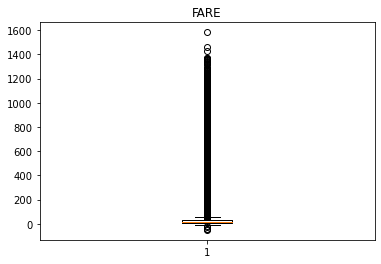

In [39]:
plt.title('FARE')
plt.boxplot(max_distance['fare_amount'])

Text(0, 0.5, 'Fare charged for the distance')

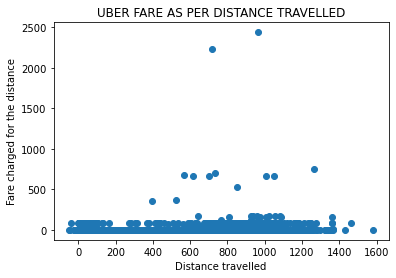

In [52]:
plt.title('UBER FARE AS PER DISTANCE TRAVELLED')
plt.scatter(max_distance['fare_amount'],max_distance['distance'])
plt.xlabel('Distance travelled') 
plt.ylabel('Fare charged for the distance')

In [55]:
df['fare_amount'].isna().sum()

0

<AxesSubplot:title={'center':'With Outliers'}, xlabel='Distance', ylabel='Fare amount (USD)'>

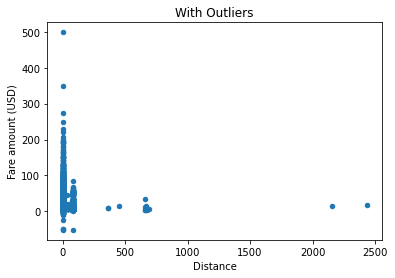

In [57]:
df.plot.scatter(x='distance', y='fare_amount', title="With Outliers", xlabel="Distance", ylabel="Fare amount (USD)")

In [59]:
print("The total fare collected is ", df.fare_amount.sum())

The total fare collected is  2271991.05


The end. 